# Dataset Informacion extra

Notebook para obtener el dataset de imagenes satelitales con informacion extra, la informacion se tomo como siempre del portal de mapas de bogota y es el mapa de `Índice de Condiciones de Seguridad Nocturna por Localidad (%). Bogotá D.C. Año 2016`

<center>
    
<div style="width:30%">
    
    
![mujeres](img/mujeres.jpg)
</div>

</center>

El dataset ya eta dividido en train y test y ya esta con sobrelapado ya solo es volver las imagenes en una matriz de dos dimensiones y concatenarla a la imagen satelital

### Categorias
El mapa muestra el procentaje, por localidad, de la probabilidad de tener un riesgo alto para las mujeres en horarios nocturnos.
Indice alto de riesgo en horarios nocturnos (18 - 23) para la mujer en las distintoas localidades.

In [104]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from scipy.signal import convolve2d
import os
%matplotlib inline

21: [  2 128   2]


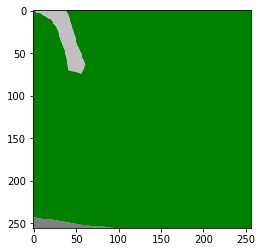

In [67]:
per_21 = io.imread("./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/8.png")
plt.imshow(per_21)
print("21:",per_21[20][0])



27: [128 128 128]


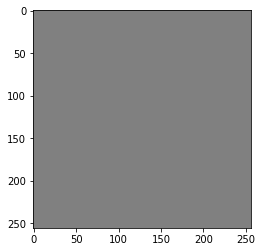

In [68]:
per_27 = io.imread("./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/22.png")
plt.imshow(per_27)
print("27:",per_27[20][0])

24: [128 129   1]


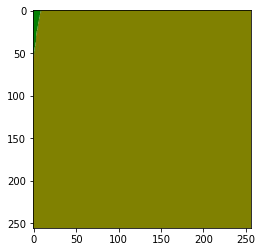

In [69]:
per_24 = io.imread("./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/313.png")
plt.imshow(per_24)
print("24:",per_24[30][150])

14: [  1 255   1]


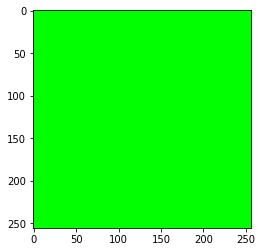

In [70]:
per_14 = io.imread("./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/61.png")
plt.imshow(per_14)
print("14:",per_14[30][150])

31: [127   1 127]


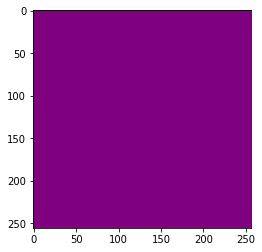

In [71]:
per_31 = io.imread("./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/167.png")
plt.imshow(per_31)
print("31:",per_31[30][150])

22: [255   1   1]


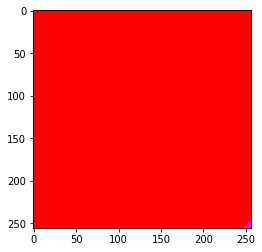

In [72]:
per_22 = io.imread("./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/183.png")
plt.imshow(per_22)
print("22:",per_22[30][150])

20: [  0 128 127]


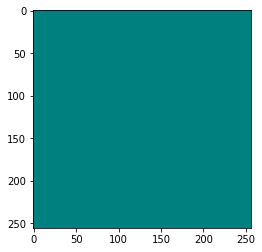

In [73]:
per_20 = io.imread("./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/289.png")
plt.imshow(per_20)
print("20:",per_20[30][150])

25: [127   1   2]


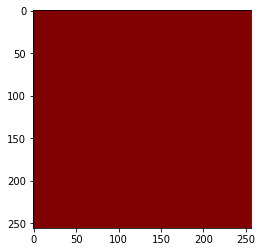

In [74]:
per_25 = io.imread("./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/145.png")
plt.imshow(per_25)
print("25:",per_25[30][150])

16: [255 255   1]


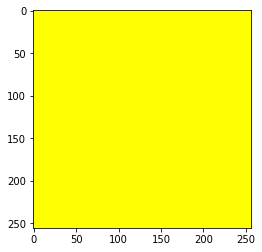

In [75]:
per_16 = io.imread("./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/167.png")
plt.imshow(per_16)
print("16:",per_16[30][150])

23: [  1   1 255]


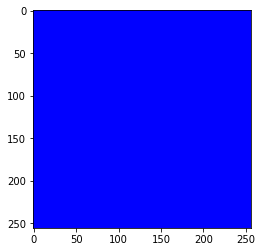

In [76]:
per_23 = io.imread("./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/124.png")
plt.imshow(per_23)
print("23:",per_23[30][150])

28: [167 202 240]


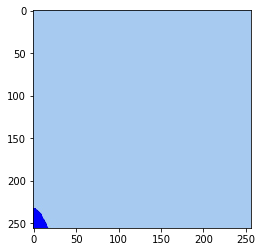

In [77]:
per_28 = io.imread("./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/0.png")
plt.imshow(per_28)
print("28:",per_28[30][150])

19: [255   1 255]


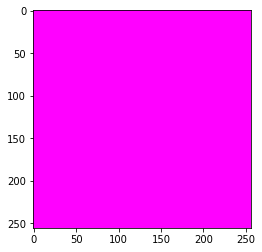

In [78]:
per_19 = io.imread("./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/215.png")
plt.imshow(per_19)
print("19:",per_19[30][150])

15: [  1 255 255]


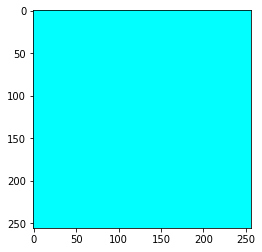

In [79]:
per_15 = io.imread("./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/247.png")
plt.imshow(per_15)
print("15:",per_15[30][150])

In [105]:
#print("23:",per_23[30][150])
#print("21:",per_21[20][0])
#print("20:",per_20[30][150])
#print("15:",per_15[30][150])
#print("14:",per_14[30][150])

#print("25:",per_25[30][150])
#print("31:",per_31[30][150])
#print("27:",per_27[20][0])
#print("24:",per_24[30][150])
#print("28:",per_28[30][150])

print("22:",per_22[30][150])
print("19:",per_19[30][150])
#print("16:",per_16[30][150])

22: [255   1   1]
19: [255   1 255]


In [94]:
def get_category_pixel(layer_to_extract):
    
    to_extract = layer_to_extract.reshape(256*256,3)
    newmat = np.zeros((256*256,))
    
    for j,i in enumerate(to_extract):
        if i[0] < 62:
            ## 23, 21, 20, 15, 14    
            if i[1] < 62:
                newmat[j] = 23    
            if 62 < i[1] < 191:
                # 21, 20        
                if i[2] < 91:
                    newmat[j] = 21
                if i[2] > 91:
                    newmat[j] = 20            
            if i[1] > 191:
                # 15 14         
                if i[2] < 127:
                    newmat[j] = 14
                if i[1] > 127:
                    newmat[j] = 15            
        if 62 < i[0] < 191:
            # 25, 31, 27, 24, 28
            if i[1] < 62:
                # 25, 31
                if i[2] < 62:
                    newmat[j] = 25
                if i[2] > 62:
                    newmat[j] = 31            
            if 62 < i[1] < 191:
                # 27, 24
                if i[2] < 62:
                    newmat[j] = 24
                if i[2] > 62:
                    newmat[j] = 27            
            if i[1] > 191:
                newmat[j] = 28


        if i[0] > 191:
            # 22, 19, 16
            if i[1] < 127:
                # 22 19
                if i[2] < 127:
                    newmat[j] = 22
                if i[2] > 127:
                    newmat[j] = 19
            if i[1] > 127:
                newmat[j] = 16
    return newmat.reshape((256,256)).astype("uint8")
    

In [ ]:
ZOOM = ["13","14","15","16","17","18","19","20"]
PATH = "./data/dataset/OVERLAECOBO/OVERLAECOBO_"
TYPE = ["train", "val"]
for i in ZOOM:

    for j in TYPE:
        list_dir = os.listdir(PATH+i+"/"+j)
        for k in list_dir:
            print(PATH+i+"/"+j+"/"+k)
            print(PATH+i+"/mujer/"+j+"/"+k)
            to_extract = io.imread(PATH+i+"/mujer/"+j+"/"+k)
            muj = get_category_pixel(to_extract).reshape((256,256,1))
            
            sat = io.imread(PATH+i+"/"+j+"/"+k)
            img_end = a = np.concatenate((sat, s), axis=2).astype("uint8")
            
            io.imsave("./data/dataset/OVERLAECOBO/OVERLAECOBO_"+i+"/multi/"+j+"/"+k, img_end)

./data/dataset/OVERLAECOBO/OVERLAECOBO_13/train/0.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_13/mujer/train/0.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_13/train/1.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_13/mujer/train/1.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_13/train/2.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_13/mujer/train/2.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_13/train/3.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_13/mujer/train/3.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_13/train/4.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_13/mujer/train/4.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_13/train/5.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_13/mujer/train/5.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_13/train/6.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_13/mujer/train/6.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_13/val/0.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_13/mujer/val/0.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_13/val/1.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_15/train/23.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/train/23.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/train/24.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/train/24.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/train/25.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/train/25.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/train/26.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/train/26.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/train/27.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/train/27.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/train/28.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/train/28.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/train/29.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/train/29.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/train/3.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/train/3.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/train/30.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_15/train/88.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/train/88.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/train/89.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/train/89.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/train/9.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/train/9.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/train/90.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/train/90.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/train/91.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/train/91.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/train/92.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/train/92.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/train/93.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/train/93.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/train/94.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/train/94.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/train/95.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_15/val/65.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/val/65.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/val/66.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/val/66.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/val/67.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/val/67.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/val/68.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/val/68.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/val/69.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/val/69.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/val/7.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/val/7.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/val/70.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/val/70.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/val/71.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/val/71.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/val/72.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_15/mujer/val/7

./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/138.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/138.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/139.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/139.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/14.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/14.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/140.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/140.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/141.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/141.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/142.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/142.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/143.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/143.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/144.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/144.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/145.png
./

./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/200.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/200.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/201.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/201.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/202.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/202.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/203.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/203.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/204.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/204.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/205.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/205.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/206.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/206.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/207.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/207.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/208.png


./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/264.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/264.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/265.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/265.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/266.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/266.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/267.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/267.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/268.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/268.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/269.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/269.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/27.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/27.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/270.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/270.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/271.png
./

./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/327.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/327.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/328.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/328.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/329.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/329.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/33.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/33.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/330.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/330.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/331.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/331.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/332.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/332.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/333.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/333.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/334.png
./

./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/8.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/8.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/80.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/80.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/81.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/81.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/82.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/82.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/83.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/83.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/84.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/84.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/85.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/85.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/86.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/train/86.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/train/87.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/143.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/143.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/144.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/144.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/145.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/145.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/146.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/146.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/147.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/147.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/148.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/148.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/149.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/149.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/15.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/15.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/150.png
./data/dataset/OVERLAECOBO/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/209.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/209.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/21.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/21.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/210.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/210.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/211.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/211.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/212.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/212.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/213.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/213.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/214.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/214.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/215.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/215.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/216.png
./data/dataset/OVERLAECOBO/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/274.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/274.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/275.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/275.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/276.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/276.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/277.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/277.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/278.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/278.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/279.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/279.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/28.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/28.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/280.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/280.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/281.png
./data/dataset/OVERLAECOBO/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/51.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/51.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/52.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/52.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/53.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/53.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/54.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/54.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/55.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/55.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/56.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/56.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/57.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/57.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/58.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val/58.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/val/59.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_16/mujer/val

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1015.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1015.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1016.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1016.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1017.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1017.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1018.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1018.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1019.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1019.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/102.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/102.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1020.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1020.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1021.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1021.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1078.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1078.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1079.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1079.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/108.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/108.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1080.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1080.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1081.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1081.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1082.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1082.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1083.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1083.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1084.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1084.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/114.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/114.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1140.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1140.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1141.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1141.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1142.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1142.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1143.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1143.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1144.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1144.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1145.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1145.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1146.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1146.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1201.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1201.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1202.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1202.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1203.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1203.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1204.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1204.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1205.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1205.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1206.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1206.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1207.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1207.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1208.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1208.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1264.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1264.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1265.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1265.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1266.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1266.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1267.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1267.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1268.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1268.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1269.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1269.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/127.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/127.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1270.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1270.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1326.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1326.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1327.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1327.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1328.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1328.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1329.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1329.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/133.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/133.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1330.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1330.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1331.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1331.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/1332.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/1332.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/186.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/186.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/187.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/187.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/188.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/188.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/189.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/189.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/19.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/19.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/190.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/190.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/191.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/191.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/192.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/192.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/193.png
./

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/249.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/249.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/25.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/25.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/250.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/250.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/251.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/251.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/252.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/252.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/253.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/253.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/254.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/254.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/255.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/255.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/256.png
./

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/311.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/311.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/312.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/312.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/313.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/313.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/314.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/314.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/315.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/315.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/316.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/316.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/317.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/317.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/318.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/318.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/319.png


./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/375.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/375.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/376.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/376.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/377.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/377.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/378.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/378.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/379.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/379.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/38.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/38.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/380.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/380.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/381.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/381.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/382.png
./

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/438.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/438.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/439.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/439.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/44.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/44.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/440.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/440.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/441.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/441.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/442.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/442.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/443.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/443.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/444.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/444.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/445.png
./

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/500.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/500.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/501.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/501.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/502.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/502.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/503.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/503.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/504.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/504.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/505.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/505.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/506.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/506.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/507.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/507.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/508.png


./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/564.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/564.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/565.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/565.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/566.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/566.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/567.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/567.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/568.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/568.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/569.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/569.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/57.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/57.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/570.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/570.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/571.png
./

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/627.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/627.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/628.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/628.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/629.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/629.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/63.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/63.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/630.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/630.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/631.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/631.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/632.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/632.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/633.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/633.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/634.png
./

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/690.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/690.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/691.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/691.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/692.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/692.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/693.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/693.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/694.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/694.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/695.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/695.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/696.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/696.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/697.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/697.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/698.png


./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/753.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/753.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/754.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/754.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/755.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/755.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/756.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/756.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/757.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/757.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/758.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/758.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/759.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/759.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/76.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/76.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/760.png
./

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/816.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/816.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/817.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/817.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/818.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/818.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/819.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/819.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/82.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/82.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/820.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/820.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/821.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/821.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/822.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/822.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/823.png
./

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/88.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/88.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/880.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/880.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/881.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/881.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/882.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/882.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/883.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/883.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/884.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/884.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/885.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/885.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/886.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/886.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/887.png
./

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/942.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/942.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/943.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/943.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/944.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/944.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/945.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/945.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/946.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/946.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/947.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/947.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/948.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/948.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/949.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/train/949.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/train/95.png
.

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1003.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1003.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1004.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1004.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1005.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1005.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1006.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1006.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1007.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1007.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1008.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1008.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1009.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1009.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/101.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/101.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1010.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1068.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1068.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1069.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1069.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/107.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/107.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1070.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1070.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1071.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1071.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1072.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1072.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1073.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1073.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1074.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1074.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1075.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1131.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1131.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1132.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1132.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1133.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1133.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1134.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1134.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1135.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1135.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1136.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1136.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1137.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1137.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1138.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1138.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1139.png
./data/dataset/OV

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1196.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1196.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1197.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1197.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1198.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1198.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1199.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1199.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/12.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/12.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/120.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/120.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1200.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1200.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1201.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/1201.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/1202.png
./data/dataset/OVERLAEC

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/179.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/179.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/18.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/18.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/180.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/180.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/181.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/181.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/182.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/182.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/183.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/183.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/184.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/184.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/185.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/185.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/186.png
./data/dataset/OVERLAECOBO/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/244.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/244.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/245.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/245.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/246.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/246.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/247.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/247.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/248.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/248.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/249.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/249.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/25.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/25.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/250.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/250.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/251.png
./data/dataset/OVERLAECOBO/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/31.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/31.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/310.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/310.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/311.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/311.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/312.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/312.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/313.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/313.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/314.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/314.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/315.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/315.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/316.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/316.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/317.png
./data/dataset/OVERLAECOBO/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/375.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/375.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/376.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/376.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/377.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/377.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/378.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/378.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/379.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/379.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/38.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/38.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/380.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/380.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/381.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/381.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/382.png
./data/dataset/OVERLAECOBO/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/440.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/440.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/441.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/441.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/442.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/442.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/443.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/443.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/444.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/444.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/445.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/445.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/446.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/446.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/447.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/447.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/448.png
./data/dataset/OVERLAECOBO/OVERLAE

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/506.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/506.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/507.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/507.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/508.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/508.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/509.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/509.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/51.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/51.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/510.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/510.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/511.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/511.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/512.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/512.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/513.png
./data/dataset/OVERLAECOBO/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/571.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/571.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/572.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/572.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/573.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/573.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/574.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/574.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/575.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/575.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/576.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/576.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/577.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/577.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/578.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/578.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/579.png
./data/dataset/OVERLAECOBO/OVERLAE

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/637.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/637.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/638.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/638.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/639.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/639.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/64.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/64.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/640.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/640.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/641.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/641.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/642.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/642.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/643.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/643.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/644.png
./data/dataset/OVERLAECOBO/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/702.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/702.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/703.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/703.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/704.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/704.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/705.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/705.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/706.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/706.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/707.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/707.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/708.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/708.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/709.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/709.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/71.png
./data/dataset/OVERLAECOBO/OVERLAEC

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/768.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/768.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/769.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/769.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/77.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/77.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/770.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/770.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/771.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/771.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/772.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/772.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/773.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/773.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/774.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/774.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/775.png
./data/dataset/OVERLAECOBO/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/833.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/833.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/834.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/834.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/835.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/835.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/836.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/836.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/837.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/837.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/838.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/838.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/839.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/839.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/84.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/84.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/840.png
./data/dataset/OVERLAECOBO/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/899.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/899.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/9.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/9.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/90.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/90.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/900.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/900.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/901.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/901.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/902.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/902.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/903.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/903.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/904.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/904.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/905.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/964.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/964.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/965.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/965.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/966.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/966.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/967.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/967.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/968.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/968.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/969.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/969.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/97.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/97.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/970.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/mujer/val/970.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_17/val/971.png
./data/dataset/OVERLAECOBO/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1026.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1026.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1027.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1027.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1028.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1028.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1029.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1029.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/103.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/103.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1030.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1030.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1031.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1031.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1032.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1032.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1089.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1089.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/109.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/109.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1090.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1090.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1091.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1091.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1092.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1092.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1093.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1093.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1094.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1094.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1095.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1095.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1150.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1150.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1151.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1151.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1152.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1152.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1153.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1153.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1154.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1154.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1155.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1155.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1156.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1156.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1157.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1157.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1212.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1212.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1213.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1213.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1214.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1214.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1215.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1215.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1216.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1216.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1217.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1217.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1218.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1218.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1219.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1219.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1275.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1275.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1276.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1276.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1277.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1277.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1278.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1278.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1279.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1279.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/128.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/128.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1280.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1280.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1281.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1281.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1337.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1337.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1338.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1338.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1339.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1339.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/134.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/134.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1340.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1340.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1341.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1341.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1342.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1342.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1343.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1343.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/14.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/14.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/140.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/140.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1400.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1400.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1401.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1401.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1402.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1402.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1403.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1403.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1404.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1404.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1405.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1405.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/trai

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1461.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1461.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1462.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1462.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1463.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1463.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1464.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1464.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1465.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1465.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1466.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1466.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1467.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1467.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1468.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1468.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1523.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1523.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1524.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1524.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1525.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1525.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1526.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1526.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1527.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1527.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1528.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1528.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1529.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1529.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/153.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/153.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1586.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1586.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1587.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1587.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1588.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1588.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1589.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1589.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/159.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/159.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1590.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1590.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1591.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1591.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1592.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1592.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1648.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1648.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1649.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1649.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/165.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/165.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1650.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1650.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1651.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1651.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1652.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1652.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1653.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1653.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1654.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1654.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/171.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/171.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1710.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1710.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1711.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1711.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1712.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1712.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1713.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1713.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1714.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1714.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1715.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1715.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1716.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1716.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1772.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1772.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1773.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1773.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1774.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1774.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1775.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1775.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1776.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1776.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1777.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1777.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1778.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1778.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1779.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1779.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1834.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1834.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1835.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1835.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1836.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1836.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1837.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1837.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1838.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1838.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1839.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1839.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/184.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/184.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1840.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1840.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1897.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1897.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1898.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1898.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1899.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1899.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/19.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/19.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/190.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/190.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1900.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1900.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1901.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1901.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1902.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1902.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/trai

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1959.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1959.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/196.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/196.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1960.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1960.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1961.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1961.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1962.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1962.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1963.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1963.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1964.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1964.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/1965.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/1965.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/202.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/202.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2020.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2020.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2021.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2021.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2022.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2022.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2023.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2023.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2024.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2024.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2025.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2025.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2026.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2026.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2082.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2082.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2083.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2083.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2084.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2084.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2085.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2085.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2086.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2086.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2087.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2087.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2088.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2088.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2089.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2089.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2144.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2144.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2145.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2145.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2146.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2146.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2147.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2147.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2148.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2148.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2149.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2149.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/215.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/215.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2150.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2150.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2206.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2206.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2207.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2207.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2208.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2208.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2209.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2209.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/221.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/221.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2210.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2210.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2211.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2211.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2212.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2212.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2269.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2269.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/227.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/227.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2270.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2270.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2271.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2271.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2272.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2272.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2273.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2273.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2274.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2274.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2275.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2275.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2330.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2330.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2331.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2331.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2332.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2332.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2333.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2333.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2334.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2334.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2335.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2335.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2336.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2336.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2337.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2337.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2393.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2393.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2394.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2394.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2395.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2395.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2396.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2396.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2397.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2397.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2398.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2398.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2399.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2399.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/24.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/24.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/tr

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2455.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2455.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2456.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2456.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2457.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2457.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2458.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2458.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2459.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2459.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/246.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/246.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2460.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2460.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2461.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2461.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2517.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2517.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2518.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2518.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2519.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2519.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/252.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/252.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2520.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2520.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2521.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2521.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2522.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2522.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2523.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2523.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/258.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/258.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2580.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2580.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2581.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2581.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2582.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2582.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2583.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2583.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2584.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2584.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2585.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2585.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2586.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2586.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2641.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2641.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2642.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2642.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2643.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2643.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2644.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2644.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2645.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2645.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2646.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2646.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2647.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2647.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2648.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2648.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2703.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2703.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2704.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2704.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2705.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2705.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2706.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2706.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2707.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2707.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2708.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2708.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2709.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2709.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/271.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/271.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2766.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2766.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2767.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2767.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2768.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2768.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2769.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2769.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/277.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/277.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2770.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2770.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2771.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2771.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2772.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2772.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2828.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2828.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2829.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2829.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/283.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/283.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2830.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2830.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2831.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2831.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2832.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2832.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2833.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2833.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2834.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2834.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2890.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2890.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2891.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2891.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2892.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2892.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2893.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2893.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2894.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2894.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2895.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2895.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2896.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2896.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2897.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2897.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2952.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2952.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2953.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2953.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2954.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2954.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2955.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2955.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2956.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2956.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2957.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2957.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2958.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2958.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/2959.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/2959.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3013.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3013.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3014.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3014.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3015.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3015.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3016.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3016.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3017.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3017.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3018.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3018.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3019.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3019.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/302.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/302.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

c:\users\daielchom\appdata\local\programs\python\python36\lib\site-packages\skimage\io\_io.py:129: UserWarning: ./data/dataset/OVERLAECOBO/OVERLAECOBO_18/multi/train/3050.png is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3051.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3051.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3052.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3052.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3053.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3053.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3054.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3054.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3055.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3055.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3056.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3056.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3057.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3057.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3058.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3058.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3113.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3113.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3114.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3114.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3115.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3115.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3116.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3116.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3117.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3117.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3118.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3118.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3119.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3119.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/312.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/312.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3176.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3176.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3177.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3177.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3178.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3178.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3179.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3179.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/318.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/318.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3180.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3180.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3181.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3181.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3182.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3182.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3238.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3238.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3239.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3239.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/324.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/324.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3240.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3240.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3241.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3241.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3242.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3242.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3243.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3243.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3244.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3244.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/330.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/330.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3300.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3300.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3301.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3301.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3302.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3302.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3303.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3303.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3304.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3304.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3305.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3305.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3306.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3306.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3362.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3362.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3363.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3363.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3364.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3364.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3365.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3365.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3366.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3366.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3367.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3367.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3368.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3368.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3369.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3369.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3424.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3424.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3425.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3425.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3426.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3426.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3427.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3427.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3428.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3428.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3429.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3429.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/343.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/343.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3430.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3430.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3487.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3487.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3488.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3488.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3489.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3489.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/349.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/349.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3490.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3490.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3491.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3491.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3492.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3492.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3493.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3493.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3549.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3549.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/355.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/355.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3550.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3550.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3551.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3551.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3552.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3552.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3553.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3553.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3554.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3554.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3555.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3555.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3610.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3610.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3611.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3611.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3612.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3612.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3613.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3613.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3614.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3614.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3615.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3615.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3616.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3616.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3617.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3617.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3673.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3673.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3674.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3674.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3675.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3675.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3676.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3676.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3677.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3677.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3678.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3678.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3679.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3679.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/368.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/368.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3735.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3735.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3736.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3736.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3737.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3737.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3738.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3738.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3739.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3739.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/374.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/374.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3740.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3740.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3741.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3741.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3798.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3798.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3799.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3799.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/38.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/38.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/380.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/380.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3800.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3800.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3801.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3801.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3802.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3802.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3803.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3803.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/trai

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/386.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/386.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3860.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3860.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3861.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3861.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3862.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3862.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3863.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3863.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3864.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3864.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3865.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3865.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3866.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3866.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3921.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3921.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3922.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3922.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3923.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3923.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3924.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3924.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3925.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3925.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3926.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3926.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3927.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3927.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3928.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3928.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3984.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3984.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3985.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3985.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3986.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3986.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3987.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3987.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3988.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3988.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3989.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3989.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/399.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/399.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/3990.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/3990.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4045.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4045.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4046.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4046.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4047.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4047.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4048.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4048.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4049.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4049.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/405.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/405.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4050.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4050.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4051.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4051.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4107.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4107.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4108.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4108.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4109.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4109.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/411.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/411.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4110.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4110.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4111.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4111.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4112.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4112.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4113.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4113.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/417.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/417.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4170.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4170.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4171.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4171.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4172.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4172.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4173.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4173.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4174.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4174.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4175.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4175.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4176.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4176.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4231.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4231.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4232.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4232.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4233.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4233.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4234.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4234.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4235.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4235.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4236.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4236.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4237.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4237.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4238.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4238.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4294.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4294.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4295.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4295.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4296.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4296.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4297.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4297.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4298.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4298.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4299.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4299.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/43.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/43.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/430.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/430.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/trai

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4356.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4356.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4357.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4357.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4358.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4358.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4359.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4359.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/436.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/436.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4360.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4360.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4361.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4361.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4362.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4362.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4418.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4418.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4419.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4419.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/442.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/442.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4420.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4420.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4421.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4421.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4422.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4422.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4423.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4423.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4424.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4424.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4480.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4480.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4481.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4481.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4482.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4482.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4483.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4483.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4484.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4484.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4485.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4485.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4486.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4486.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4487.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4487.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4542.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4542.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4543.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4543.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4544.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4544.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4545.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4545.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4546.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4546.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4547.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4547.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4548.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4548.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4549.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4549.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4604.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4604.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4605.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4605.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4606.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4606.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4607.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4607.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4608.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4608.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4609.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4609.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/461.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/461.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4610.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4610.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4667.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4667.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4668.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4668.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4669.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4669.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/467.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/467.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4670.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4670.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4671.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4671.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4672.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4672.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4673.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4673.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4729.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4729.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/473.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/473.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4730.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4730.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4731.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4731.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4732.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4732.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4733.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4733.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4734.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4734.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4735.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4735.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4791.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4791.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4792.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4792.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4793.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4793.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4794.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4794.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4795.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4795.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4796.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4796.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4797.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4797.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4798.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4798.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4853.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4853.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4854.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4854.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4855.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4855.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4856.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4856.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4857.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4857.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4858.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4858.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4859.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4859.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/486.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/486.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4915.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4915.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4916.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4916.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4917.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4917.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4918.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4918.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4919.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4919.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/492.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/492.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4920.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4920.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4921.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4921.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4978.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4978.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4979.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4979.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/498.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/498.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4980.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4980.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4981.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4981.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4982.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4982.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4983.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4983.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/4984.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/4984.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5039.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5039.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/504.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/504.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5040.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5040.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5041.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5041.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5042.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5042.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5043.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5043.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5044.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5044.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5045.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5045.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5100.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5100.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5101.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5101.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5102.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5102.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5103.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5103.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5104.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5104.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5105.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5105.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5106.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5106.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5107.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5107.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5163.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5163.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5164.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5164.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5165.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5165.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5166.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5166.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5167.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5167.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5168.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5168.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5169.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5169.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/517.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/517.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5225.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5225.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5226.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5226.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5227.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5227.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5228.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5228.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5229.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5229.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/523.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/523.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5230.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5230.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5231.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5231.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5288.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5288.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5289.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5289.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/529.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/529.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5290.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5290.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5291.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5291.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5292.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5292.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5293.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5293.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/5294.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/5294.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/550.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/550.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/551.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/551.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/552.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/552.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/553.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/553.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/554.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/554.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/555.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/555.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/556.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/556.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/557.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/557.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/558.png


./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/613.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/613.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/614.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/614.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/615.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/615.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/616.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/616.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/617.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/617.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/618.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/618.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/619.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/619.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/62.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/62.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/620.png
./

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/677.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/677.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/678.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/678.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/679.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/679.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/68.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/68.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/680.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/680.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/681.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/681.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/682.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/682.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/683.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/683.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/684.png
./

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/74.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/74.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/740.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/740.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/741.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/741.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/742.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/742.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/743.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/743.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/744.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/744.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/745.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/745.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/746.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/746.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/747.png
./

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/802.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/802.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/803.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/803.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/804.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/804.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/805.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/805.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/806.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/806.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/807.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/807.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/808.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/808.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/809.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/809.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/81.png
.

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/866.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/866.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/867.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/867.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/868.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/868.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/869.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/869.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/87.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/87.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/870.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/870.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/871.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/871.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/872.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/872.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/873.png
./

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/929.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/929.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/93.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/93.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/930.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/930.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/931.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/931.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/932.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/932.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/933.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/933.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/934.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/934.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/935.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/935.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/936.png
./

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/992.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/992.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/993.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/993.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/994.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/994.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/995.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/995.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/996.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/996.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/997.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/997.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/998.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/998.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/train/999.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/train/999.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/0.png
./da

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1054.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1054.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1055.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1055.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1056.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1056.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1057.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1057.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1058.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1058.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1059.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1059.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/106.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/106.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1060.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1060.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1061.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1118.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1118.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1119.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1119.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/112.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/112.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1120.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1120.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1121.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1121.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1122.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1122.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1123.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1123.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1124.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1124.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1125.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1182.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1182.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1183.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1183.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1184.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1184.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1185.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1185.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1186.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1186.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1187.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1187.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1188.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1188.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1189.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1189.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/119.png
./data/dataset/OVE

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1246.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1246.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1247.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1247.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1248.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1248.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1249.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1249.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/125.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/125.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1250.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1250.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1251.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1251.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1252.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1252.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1253.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/131.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/131.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1310.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1310.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1311.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1311.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1312.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1312.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1313.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1313.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1314.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1314.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1315.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1315.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1316.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1316.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1317.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1374.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1374.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1375.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1375.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1376.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1376.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1377.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1377.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1378.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1378.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1379.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1379.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/138.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/138.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1380.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1380.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1381.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1438.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1438.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1439.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1439.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/144.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/144.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1440.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1440.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1441.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1441.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1442.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1442.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1443.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1443.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1444.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1444.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1445.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1501.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1501.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1502.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1502.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1503.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1503.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1504.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1504.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1505.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1505.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1506.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1506.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1507.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1507.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1508.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1508.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1509.png
./data/dataset/OV

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1566.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1566.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1567.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1567.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1568.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1568.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1569.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1569.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/157.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/157.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1570.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1570.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1571.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1571.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1572.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1572.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1573.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/163.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/163.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1630.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1630.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1631.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1631.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1632.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1632.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1633.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1633.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1634.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1634.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1635.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1635.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1636.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1636.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1637.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1694.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1694.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1695.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1695.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1696.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1696.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1697.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1697.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1698.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1698.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1699.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1699.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/17.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/17.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/170.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/170.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1700.png
./data/dataset/OVERLAEC

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1758.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1758.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1759.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1759.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/176.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/176.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1760.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1760.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1761.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1761.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1762.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1762.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1763.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1763.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1764.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1764.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1765.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1821.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1821.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1822.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1822.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1823.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1823.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1824.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1824.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1825.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1825.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1826.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1826.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1827.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1827.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1828.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1828.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1829.png
./data/dataset/OV

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1886.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1886.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1887.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1887.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1888.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1888.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1889.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1889.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/189.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/189.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1890.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1890.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1891.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1891.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1892.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1892.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1893.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/195.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/195.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1950.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1950.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1951.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1951.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1952.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1952.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1953.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1953.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1954.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1954.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1955.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1955.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1956.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/1956.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/1957.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2012.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2012.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2013.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2013.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2014.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2014.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2015.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2015.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2016.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2016.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2017.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2017.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2018.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2018.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2019.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2019.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/202.png
./data/dataset/OVE

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2077.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2077.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2078.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2078.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2079.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2079.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/208.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/208.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2080.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2080.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2081.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2081.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2082.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2082.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2083.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2083.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2084.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2140.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2140.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2141.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2141.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2142.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2142.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2143.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2143.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2144.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2144.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2145.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2145.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2146.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2146.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2147.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2147.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2148.png
./data/dataset/OV

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2204.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2204.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2205.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2205.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2206.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2206.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2207.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2207.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2208.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2208.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2209.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2209.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/221.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/221.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2210.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2210.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2211.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2269.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2269.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/227.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/227.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2270.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2270.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2271.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2271.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2272.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2272.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2273.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2273.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2274.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2274.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2275.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2275.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2276.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2332.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2332.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2333.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2333.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2334.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2334.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2335.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2335.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2336.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2336.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2337.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2337.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2338.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2338.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2339.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2339.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/234.png
./data/dataset/OVE

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2397.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2397.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2398.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2398.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2399.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2399.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/24.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/24.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/240.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/240.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2400.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2400.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2401.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2401.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2402.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2402.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2403.png
./data/dataset/OVERLAEC

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2460.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2460.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2461.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2461.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2462.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2462.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2463.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2463.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2464.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2464.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2465.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2465.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2466.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2466.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2467.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2467.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2468.png
./data/dataset/OV

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2524.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2524.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2525.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2525.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2526.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2526.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2527.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2527.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2528.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2528.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2529.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2529.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/253.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/253.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2530.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2530.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2531.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2589.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2589.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/259.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/259.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2590.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2590.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2591.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2591.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2592.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2592.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2593.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2593.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2594.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2594.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2595.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2595.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2596.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2652.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2652.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2653.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2653.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2654.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2654.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2655.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2655.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2656.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2656.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2657.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2657.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2658.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2658.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2659.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2659.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/266.png
./data/dataset/OVE

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2716.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2716.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2717.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2717.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2718.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2718.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2719.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2719.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/272.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/272.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2720.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2720.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2721.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2721.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2722.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2722.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2723.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2780.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2780.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2781.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2781.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2782.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2782.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2783.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2783.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2784.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2784.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2785.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2785.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2786.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2786.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2787.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2787.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2788.png
./data/dataset/OV

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2844.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2844.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2845.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2845.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2846.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2846.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2847.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2847.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2848.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2848.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2849.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2849.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/285.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/285.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2850.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2850.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2851.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2908.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2908.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2909.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2909.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/291.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/291.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2910.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2910.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2911.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2911.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2912.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2912.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2913.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2913.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2914.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2914.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2915.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2972.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2972.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2973.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2973.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2974.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2974.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2975.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2975.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2976.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2976.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2977.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2977.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2978.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2978.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/2979.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/2979.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/298.png
./data/dataset/OVE

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3035.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3035.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3036.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3036.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3037.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3037.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3038.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3038.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3039.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3039.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/304.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/304.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3040.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3040.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3041.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3041.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3042.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/31.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/31.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/310.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/310.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3100.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3100.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3101.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3101.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3102.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3102.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3103.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3103.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3104.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3104.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3105.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3105.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3106.png
./data/dataset/OVERLAEC

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3163.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3163.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3164.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3164.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3165.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3165.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3166.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3166.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3167.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3167.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3168.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3168.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3169.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3169.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/317.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/317.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3170.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3227.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3227.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3228.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3228.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3229.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3229.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/323.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/323.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3230.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3230.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3231.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3231.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3232.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3232.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3233.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3233.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3234.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3291.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3291.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3292.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3292.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3293.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3293.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3294.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3294.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3295.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3295.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3296.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3296.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3297.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3297.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3298.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3298.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3299.png
./data/dataset/OV

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3355.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3355.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3356.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3356.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3357.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3357.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3358.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3358.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3359.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3359.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/336.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/336.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3360.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3360.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3361.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3361.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3362.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3419.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3419.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/342.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/342.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3420.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3420.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3421.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3421.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3422.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3422.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3423.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3423.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3424.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3424.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3425.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3425.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3426.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3483.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3483.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3484.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3484.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3485.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3485.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3486.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3486.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3487.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3487.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3488.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3488.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3489.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3489.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/349.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/349.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3490.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3547.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3547.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3548.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3548.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3549.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3549.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/355.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/355.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3550.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3550.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3551.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3551.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3552.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3552.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3553.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3553.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3554.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3610.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3610.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3611.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3611.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3612.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3612.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3613.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3613.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3614.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3614.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3615.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3615.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3616.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3616.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3617.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3617.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3618.png
./data/dataset/OV

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3675.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3675.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3676.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3676.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3677.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3677.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3678.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3678.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3679.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3679.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/368.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/368.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3680.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3680.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3681.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3681.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3682.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3739.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3739.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/374.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/374.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3740.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3740.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3741.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3741.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3742.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3742.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3743.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3743.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3744.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3744.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3745.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3745.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3746.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3802.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3802.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3803.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3803.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3804.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3804.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3805.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3805.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3806.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3806.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3807.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3807.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3808.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3808.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3809.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3809.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/381.png
./data/dataset/OVE

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3867.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3867.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3868.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3868.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3869.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3869.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/387.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/387.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3870.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3870.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3871.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3871.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3872.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3872.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3873.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3873.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3874.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3930.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3930.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3931.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3931.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3932.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3932.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3933.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3933.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3934.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3934.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3935.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3935.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3936.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3936.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3937.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3937.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3938.png
./data/dataset/OV

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3995.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3995.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3996.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3996.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3997.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3997.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3998.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3998.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/3999.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/3999.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/40.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/40.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/400.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/400.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4000.png
./data/dataset/OVERLAECOBO/OV

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4058.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4058.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4059.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4059.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/406.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/406.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4060.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4060.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4061.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4061.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4062.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4062.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4063.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4063.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4064.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4064.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4065.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4121.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4121.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4122.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4122.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4123.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4123.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4124.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4124.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4125.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4125.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4126.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4126.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4127.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4127.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4128.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4128.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4129.png
./data/dataset/OV

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4186.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4186.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4187.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4187.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4188.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4188.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4189.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4189.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/419.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/419.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4190.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4190.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4191.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4191.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4192.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4192.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4193.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/425.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/425.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4250.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4250.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4251.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4251.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4252.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4252.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4253.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4253.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4254.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4254.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4255.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4255.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4256.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4256.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4257.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4313.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4313.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4314.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4314.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4315.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4315.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4316.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4316.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4317.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4317.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4318.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4318.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4319.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4319.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/432.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/432.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4320.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4378.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4378.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4379.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4379.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/438.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/438.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4380.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4380.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4381.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4381.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4382.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4382.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4383.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4383.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4384.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4384.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4385.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4441.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4441.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4442.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4442.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4443.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4443.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4444.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4444.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4445.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4445.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4446.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4446.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4447.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4447.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4448.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4448.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4449.png
./data/dataset/OV

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4505.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4505.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4506.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4506.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4507.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4507.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4508.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4508.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4509.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4509.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/451.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/451.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4510.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4510.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4511.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4511.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4512.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/457.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/457.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4570.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4570.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4571.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4571.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4572.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4572.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4573.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4573.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4574.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4574.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4575.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4575.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4576.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/4576.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/4577.png
./data/dataset/OVER

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/509.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/509.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/51.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/51.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/510.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/510.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/511.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/511.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/512.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/512.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/513.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/513.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/514.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/514.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/515.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/515.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/516.png
./data/dataset/OVERLAECOBO/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/574.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/574.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/575.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/575.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/576.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/576.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/577.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/577.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/578.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/578.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/579.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/579.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/58.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/58.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/580.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/580.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/581.png
./data/dataset/OVERLAECOBO/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/64.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/64.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/640.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/640.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/641.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/641.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/642.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/642.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/643.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/643.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/644.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/644.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/645.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/645.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/646.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/646.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/647.png
./data/dataset/OVERLAECOBO/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/705.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/705.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/706.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/706.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/707.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/707.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/708.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/708.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/709.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/709.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/71.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/71.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/710.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/710.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/711.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/711.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/712.png
./data/dataset/OVERLAECOBO/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/770.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/770.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/771.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/771.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/772.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/772.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/773.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/773.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/774.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/774.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/775.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/775.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/776.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/776.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/777.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/777.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/778.png
./data/dataset/OVERLAECOBO/OVERLAE

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/836.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/836.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/837.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/837.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/838.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/838.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/839.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/839.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/84.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/84.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/840.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/840.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/841.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/841.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/842.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/842.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/843.png
./data/dataset/OVERLAECOBO/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/901.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/901.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/902.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/902.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/903.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/903.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/904.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/904.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/905.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/905.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/906.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/906.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/907.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/907.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/908.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/908.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/909.png
./data/dataset/OVERLAECOBO/OVERLAE

./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/967.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/967.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/968.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/968.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/969.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/969.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/97.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/97.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/970.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/970.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/971.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/971.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/972.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/972.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/973.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/mujer/val/973.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_18/val/974.png
./data/dataset/OVERLAECOBO/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10027.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10027.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10028.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10028.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10029.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10029.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1003.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1003.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10030.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10030.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10031.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10031.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10032.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10032.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10033.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10033.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10089.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10089.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1009.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1009.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10090.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10090.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10091.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10091.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10092.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10092.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10093.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10093.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10094.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10094.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10095.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10095.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1015.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1015.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10150.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10150.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10151.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10151.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10152.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10152.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10153.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10153.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10154.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10154.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10155.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10155.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10156.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10156.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10210.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10210.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10211.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10211.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10212.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10212.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10213.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10213.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10214.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10214.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10215.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10215.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10216.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10216.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10217.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10217.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10272.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10272.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10273.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10273.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10274.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10274.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10275.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10275.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10276.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10276.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10277.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10277.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10278.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10278.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10279.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10279.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10333.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10333.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10334.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10334.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10335.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10335.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10336.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10336.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10337.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10337.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10338.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10338.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10339.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10339.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1034.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1034.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10395.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10395.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10396.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10396.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10397.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10397.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10398.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10398.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10399.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10399.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/104.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/104.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1040.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1040.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10400.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10400.png
./data/dataset/OVERLAECOBO/OVE

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10456.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10456.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10457.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10457.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10458.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10458.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10459.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10459.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1046.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1046.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10460.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10460.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10461.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10461.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10462.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10462.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10517.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10517.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10518.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10518.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10519.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10519.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1052.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1052.png


c:\users\daielchom\appdata\local\programs\python\python36\lib\site-packages\skimage\io\_io.py:129: UserWarning: ./data/dataset/OVERLAECOBO/OVERLAECOBO_19/multi/train/1052.png is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10520.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10520.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10521.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10521.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10522.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10522.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10523.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10523.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10524.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10524.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10525.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10525.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10526.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10526.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10527.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10527.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10582.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10582.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10583.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10583.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10584.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10584.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10585.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10585.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10586.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10586.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10587.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10587.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10588.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10588.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10589.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10589.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10643.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10643.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10644.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10644.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10645.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10645.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10646.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10646.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10647.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10647.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10648.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10648.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10649.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10649.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1065.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1065.png
./data/dataset/OVERLAECOBO

c:\users\daielchom\appdata\local\programs\python\python36\lib\site-packages\skimage\io\_io.py:129: UserWarning: ./data/dataset/OVERLAECOBO/OVERLAECOBO_19/multi/train/10699.png is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/107.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/107.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1070.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1070.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10700.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10700.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10701.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10701.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10702.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10702.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10703.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10703.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10704.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10704.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10705.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10705.png
./data/dataset/OVERLAECOBO/OVE

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10760.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10760.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10761.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10761.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10762.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10762.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10763.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10763.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10764.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10764.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10765.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10765.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10766.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10766.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10767.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10767.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10821.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10821.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10822.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10822.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10823.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10823.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10824.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10824.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10825.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10825.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10826.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10826.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10827.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10827.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10828.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10828.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10883.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10883.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10884.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10884.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10885.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10885.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10886.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10886.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10887.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10887.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10888.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10888.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10889.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10889.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1089.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1089.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10944.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10944.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10945.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10945.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10946.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10946.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10947.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10947.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10948.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10948.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10949.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10949.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1095.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1095.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/10950.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/10950.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11004.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11004.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11005.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11005.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11006.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11006.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11007.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11007.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11008.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11008.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11009.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11009.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1101.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1101.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11010.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11010.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11066.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11066.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11067.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11067.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11068.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11068.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11069.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11069.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1107.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1107.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11070.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11070.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11071.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11071.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11072.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11072.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11127.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11127.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11128.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11128.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11129.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11129.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1113.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1113.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11130.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11130.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11131.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11131.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11132.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11132.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11133.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11133.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11189.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11189.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1119.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1119.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11190.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11190.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11191.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11191.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11192.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11192.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11193.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11193.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11194.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11194.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11195.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11195.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1125.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1125.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11250.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11250.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11251.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11251.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11252.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11252.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11253.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11253.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11254.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11254.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11255.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11255.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11256.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11256.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11310.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11310.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11311.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11311.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11312.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11312.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11313.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11313.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11314.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11314.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11315.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11315.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11316.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11316.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11317.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11317.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11372.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11372.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11373.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11373.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11374.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11374.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11375.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11375.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11376.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11376.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11377.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11377.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11378.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11378.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11379.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11379.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11433.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11433.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11434.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11434.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11435.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11435.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11436.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11436.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11437.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11437.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11438.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11438.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11439.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11439.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1144.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1144.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11495.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11495.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11496.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11496.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11497.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11497.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11498.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11498.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11499.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11499.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/115.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/115.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1150.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1150.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11500.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11500.png
./data/dataset/OVERLAECOBO/OVE

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11556.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11556.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11557.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11557.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11558.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11558.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11559.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11559.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1156.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1156.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11560.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11560.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11561.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11561.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11562.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11562.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11617.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11617.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11618.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11618.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11619.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11619.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1162.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1162.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11620.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11620.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11621.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11621.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11622.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11622.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11623.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11623.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11679.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11679.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1168.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1168.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11680.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11680.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11681.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11681.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11682.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11682.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11683.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11683.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11684.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11684.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11685.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11685.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1174.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1174.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11740.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11740.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11741.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11741.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11742.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11742.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11743.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11743.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11744.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11744.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11745.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11745.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11746.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11746.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11800.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11800.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11801.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11801.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11802.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11802.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11803.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11803.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11804.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11804.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11805.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11805.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11806.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11806.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11807.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11807.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11862.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11862.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11863.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11863.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11864.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11864.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11865.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11865.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11866.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11866.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11867.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11867.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11868.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11868.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11869.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11869.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11923.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11923.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11924.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11924.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11925.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11925.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11926.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11926.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11927.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11927.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11928.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11928.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11929.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11929.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1193.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1193.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11985.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11985.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11986.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11986.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11987.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11987.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11988.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11988.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11989.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11989.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1199.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1199.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11990.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11990.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/11991.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/11991.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12045.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12045.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12046.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12046.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12047.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12047.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12048.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12048.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12049.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12049.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1205.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1205.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12050.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12050.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12051.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12051.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12106.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12106.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12107.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12107.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12108.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12108.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12109.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12109.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1211.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1211.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12110.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12110.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12111.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12111.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12112.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12112.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12168.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12168.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12169.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12169.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1217.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1217.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12170.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12170.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12171.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12171.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12172.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12172.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12173.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12173.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12174.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12174.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12229.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12229.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1223.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1223.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12230.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12230.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12231.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12231.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12232.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12232.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12233.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12233.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12234.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12234.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12235.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12235.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12290.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12290.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12291.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12291.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12292.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12292.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12293.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12293.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12294.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12294.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12295.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12295.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12296.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12296.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12297.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12297.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12351.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12351.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12352.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12352.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12353.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12353.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12354.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12354.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12355.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12355.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12356.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12356.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12357.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12357.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12358.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12358.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12412.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12412.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12413.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12413.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12414.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12414.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12415.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12415.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12416.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12416.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12417.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12417.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12418.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12418.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12419.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12419.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12474.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12474.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12475.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12475.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12476.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12476.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12477.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12477.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12478.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12478.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12479.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12479.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1248.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1248.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12480.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12480.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12535.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12535.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12536.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12536.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12537.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12537.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12538.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12538.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12539.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12539.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1254.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1254.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12540.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12540.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12541.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12541.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12597.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12597.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12598.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12598.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12599.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12599.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/126.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/126.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1260.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1260.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12600.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12600.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12601.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12601.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12602.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12602.png
./data/dataset/OVERLAECOBO/OVE

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12658.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12658.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12659.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12659.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1266.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1266.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12660.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12660.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12661.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12661.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12662.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12662.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12663.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12663.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12664.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12664.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12719.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12719.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1272.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1272.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12720.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12720.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12721.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12721.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12722.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12722.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12723.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12723.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12724.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12724.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12725.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12725.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12780.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12780.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12781.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12781.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12782.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12782.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12783.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12783.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12784.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12784.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12785.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12785.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12786.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12786.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12787.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12787.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12841.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12841.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12842.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12842.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12843.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12843.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12844.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12844.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12845.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12845.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12846.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12846.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12847.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12847.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12848.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12848.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12902.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12902.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12903.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12903.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12904.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12904.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12905.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12905.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12906.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12906.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12907.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12907.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12908.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12908.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12909.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12909.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12964.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12964.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12965.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12965.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12966.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12966.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12967.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12967.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12968.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12968.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12969.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12969.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1297.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1297.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/12970.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/12970.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13024.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13024.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13025.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13025.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13026.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13026.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13027.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13027.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13028.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13028.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13029.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13029.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1303.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1303.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13030.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13030.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13086.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13086.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13087.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13087.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13088.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13088.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13089.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13089.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1309.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1309.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13090.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13090.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13091.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13091.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13092.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13092.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13147.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13147.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13148.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13148.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13149.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13149.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1315.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1315.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13150.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13150.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13151.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13151.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13152.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13152.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13153.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13153.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13208.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13208.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13209.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13209.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1321.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1321.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13210.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13210.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13211.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13211.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13212.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13212.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13213.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13213.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13214.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13214.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1327.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1327.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13270.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13270.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13271.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13271.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13272.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13272.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13273.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13273.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13274.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13274.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13275.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13275.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13276.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13276.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13330.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13330.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13331.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13331.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13332.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13332.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13333.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13333.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13334.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13334.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13335.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13335.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13336.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13336.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13337.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13337.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13392.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13392.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13393.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13393.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13394.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13394.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13395.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13395.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13396.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13396.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13397.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13397.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13398.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13398.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13399.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13399.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13453.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13453.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13454.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13454.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13455.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13455.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13456.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13456.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13457.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13457.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13458.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13458.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13459.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13459.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1346.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1346.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13514.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13514.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13515.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13515.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13516.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13516.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13517.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13517.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13518.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13518.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13519.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13519.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1352.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1352.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13520.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13520.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13576.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13576.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13577.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13577.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13578.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13578.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13579.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13579.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1358.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1358.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13580.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13580.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13581.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13581.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13582.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13582.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13637.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13637.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13638.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13638.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13639.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13639.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1364.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1364.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13640.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13640.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13641.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13641.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13642.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13642.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13643.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13643.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13699.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13699.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/137.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/137.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1370.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1370.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13700.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13700.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13701.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13701.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13702.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13702.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13703.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13703.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13704.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13704.png
./data/dataset/OVERLAECOBO/OVE

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1376.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1376.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13760.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13760.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13761.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13761.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13762.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13762.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13763.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13763.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13764.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13764.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13765.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13765.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13766.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13766.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13820.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13820.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13821.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13821.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13822.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13822.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13823.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13823.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13824.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13824.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13825.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13825.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13826.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13826.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13827.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13827.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13882.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13882.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13883.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13883.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13884.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13884.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13885.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13885.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13886.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13886.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13887.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13887.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13888.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13888.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13889.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13889.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13943.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13943.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13944.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13944.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13945.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13945.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13946.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13946.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13947.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13947.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13948.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13948.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/13949.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/13949.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1395.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1395.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14003.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14003.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14004.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14004.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14005.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14005.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14006.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14006.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14007.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14007.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14008.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14008.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14009.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14009.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1401.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1401.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14065.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14065.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14066.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14066.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14067.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14067.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14068.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14068.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14069.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14069.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1407.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1407.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14070.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14070.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14071.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14071.png


c:\users\daielchom\appdata\local\programs\python\python36\lib\site-packages\skimage\io\_io.py:129: UserWarning: ./data/dataset/OVERLAECOBO/OVERLAECOBO_19/multi/train/14071.png is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14072.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14072.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14073.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14073.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14074.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14074.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14075.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14075.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14076.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14076.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14077.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14077.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14078.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14078.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14079.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14079.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14133.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14133.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14134.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14134.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14135.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14135.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14136.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14136.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14137.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14137.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14138.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14138.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14139.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14139.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1414.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1414.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14195.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14195.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14196.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14196.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14197.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14197.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14198.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14198.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14199.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14199.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/142.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/142.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1420.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1420.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14200.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14200.png
./data/dataset/OVERLAECOBO/OVE

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14256.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14256.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14257.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14257.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14258.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14258.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14259.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14259.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1426.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1426.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14260.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14260.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14261.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14261.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14262.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14262.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14317.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14317.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14318.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14318.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14319.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14319.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1432.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1432.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14320.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14320.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14321.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14321.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14322.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14322.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14323.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14323.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14379.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14379.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1438.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1438.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14380.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14380.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14381.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14381.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14382.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14382.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14383.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14383.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14384.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14384.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14385.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14385.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1444.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1444.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14440.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14440.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14441.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14441.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14442.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14442.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14443.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14443.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14444.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14444.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14445.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14445.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14446.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14446.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14500.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14500.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14501.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14501.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14502.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14502.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14503.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14503.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14504.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14504.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14505.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14505.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14506.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14506.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14507.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14507.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14562.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14562.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14563.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14563.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14564.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14564.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14565.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14565.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14566.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14566.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14567.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14567.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14568.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14568.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14569.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14569.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14623.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14623.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14624.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14624.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14625.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14625.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14626.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14626.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14627.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14627.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14628.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14628.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14629.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14629.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1463.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1463.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14685.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14685.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14686.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14686.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14687.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14687.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14688.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14688.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14689.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14689.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1469.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1469.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14690.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14690.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14691.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14691.png
./data/dataset/OVERLAECOBO

c:\users\daielchom\appdata\local\programs\python\python36\lib\site-packages\skimage\io\_io.py:129: UserWarning: ./data/dataset/OVERLAECOBO/OVERLAECOBO_19/multi/train/1470.png is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14700.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14700.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14701.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14701.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14702.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14702.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14703.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14703.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14704.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14704.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14705.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14705.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14706.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14706.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14707.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14707.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14762.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14762.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14763.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14763.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14764.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14764.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14765.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14765.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14766.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14766.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14767.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14767.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14768.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14768.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14769.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14769.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14823.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14823.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14824.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14824.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14825.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14825.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14826.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14826.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14827.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14827.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14828.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14828.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14829.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14829.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1483.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1483.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14885.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14885.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14886.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14886.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14887.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14887.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14888.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14888.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14889.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14889.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1489.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1489.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14890.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14890.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14891.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14891.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14946.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14946.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14947.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14947.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14948.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14948.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14949.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14949.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1495.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1495.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14950.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14950.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14951.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14951.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/14952.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/14952.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15006.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15006.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15007.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15007.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15008.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15008.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15009.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15009.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1501.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1501.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15010.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15010.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15011.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15011.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15012.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15012.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15068.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15068.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15069.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15069.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1507.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1507.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15070.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15070.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15071.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15071.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15072.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15072.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15073.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15073.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15074.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15074.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15129.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15129.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1513.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1513.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15130.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15130.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15131.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15131.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15132.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15132.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15133.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15133.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15134.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15134.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15135.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15135.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15190.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15190.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15191.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15191.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15192.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15192.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15193.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15193.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15194.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15194.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15195.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15195.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15196.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15196.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15197.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15197.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15251.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15251.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15252.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15252.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15253.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15253.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15254.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15254.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15255.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15255.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15256.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15256.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15257.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15257.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15258.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15258.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15312.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15312.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15313.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15313.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15314.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15314.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15315.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15315.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15316.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15316.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15317.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15317.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15318.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15318.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15319.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15319.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15374.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15374.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15375.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15375.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15376.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15376.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15377.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15377.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15378.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15378.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15379.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15379.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1538.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1538.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15380.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15380.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15435.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15435.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15436.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15436.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15437.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15437.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15438.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15438.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15439.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15439.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1544.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1544.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15440.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15440.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15441.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15441.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15497.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15497.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15498.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15498.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15499.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15499.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/155.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/155.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1550.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1550.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15500.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15500.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15501.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15501.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15502.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15502.png
./data/dataset/OVERLAECOBO/OVE

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15558.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15558.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15559.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15559.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1556.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1556.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15560.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15560.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15561.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15561.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15562.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15562.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15563.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15563.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15564.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15564.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15619.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15619.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1562.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1562.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15620.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15620.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15621.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15621.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15622.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15622.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15623.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15623.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15624.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15624.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15625.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15625.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15680.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15680.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15681.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15681.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15682.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15682.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15683.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15683.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15684.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15684.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15685.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15685.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15686.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15686.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15687.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15687.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15741.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15741.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15742.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15742.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15743.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15743.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15744.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15744.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15745.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15745.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15746.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15746.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15747.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15747.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15748.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15748.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15802.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15802.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15803.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15803.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15804.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15804.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15805.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15805.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15806.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15806.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15807.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15807.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15808.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15808.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15809.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15809.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15864.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15864.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15865.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15865.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15866.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15866.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15867.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15867.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15868.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15868.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15869.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15869.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1587.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1587.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15870.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15870.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15925.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15925.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15926.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15926.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15927.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15927.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15928.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15928.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15929.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15929.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1593.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1593.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15930.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15930.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15931.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15931.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15987.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15987.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15988.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15988.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15989.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15989.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1599.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1599.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15990.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15990.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15991.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15991.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15992.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15992.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/15993.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/15993.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16047.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16047.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16048.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16048.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16049.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16049.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1605.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1605.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16050.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16050.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16051.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16051.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16052.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16052.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16053.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16053.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16108.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16108.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16109.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16109.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1611.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1611.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16110.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16110.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16111.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16111.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16112.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16112.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16113.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16113.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16114.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16114.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1617.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1617.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16170.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16170.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16171.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16171.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16172.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16172.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16173.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16173.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16174.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16174.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16175.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16175.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16176.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16176.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16230.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16230.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16231.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16231.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16232.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16232.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16233.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16233.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16234.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16234.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16235.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16235.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16236.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16236.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16237.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16237.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16292.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16292.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16293.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16293.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16294.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16294.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16295.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16295.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16296.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16296.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16297.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16297.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16298.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16298.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16299.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16299.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16353.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16353.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16354.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16354.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16355.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16355.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16356.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16356.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16357.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16357.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16358.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16358.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16359.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16359.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1636.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1636.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16414.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16414.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16415.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16415.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16416.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16416.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16417.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16417.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16418.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16418.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16419.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16419.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1642.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1642.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16420.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16420.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16476.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16476.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16477.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16477.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16478.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16478.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16479.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16479.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1648.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1648.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16480.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16480.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16481.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16481.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16482.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16482.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16537.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16537.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16538.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16538.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16539.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16539.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1654.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1654.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16540.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16540.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16541.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16541.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16542.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16542.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16543.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16543.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16599.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16599.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/166.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/166.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1660.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1660.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16600.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16600.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16601.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16601.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16602.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16602.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16603.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16603.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16604.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16604.png
./data/dataset/OVERLAECOBO/OVE

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1666.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1666.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16660.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16660.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16661.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16661.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16662.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16662.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16663.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16663.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16664.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16664.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16665.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16665.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16666.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16666.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16720.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16720.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16721.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16721.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16722.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16722.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16723.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16723.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16724.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16724.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16725.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16725.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16726.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16726.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16727.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16727.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16782.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16782.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16783.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16783.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16784.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16784.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16785.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16785.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16786.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16786.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16787.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16787.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16788.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16788.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16789.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16789.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16843.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16843.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16844.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16844.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16845.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16845.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16846.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16846.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16847.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16847.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16848.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16848.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16849.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16849.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1685.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1685.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16904.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16904.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16905.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16905.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16906.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16906.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16907.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16907.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16908.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16908.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16909.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16909.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1691.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1691.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16910.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16910.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16966.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16966.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16967.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16967.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16968.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16968.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16969.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16969.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1697.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1697.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16970.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16970.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16971.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16971.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/16972.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/16972.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17026.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17026.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17027.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17027.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17028.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17028.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17029.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17029.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1703.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1703.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17030.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17030.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17031.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17031.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17032.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17032.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17088.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17088.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17089.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17089.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1709.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1709.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17090.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17090.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17091.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17091.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17092.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17092.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17093.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17093.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17094.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17094.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17149.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17149.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1715.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1715.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17150.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17150.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17151.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17151.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17152.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17152.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17153.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17153.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17154.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17154.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17155.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17155.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1721.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1721.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17210.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17210.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17211.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17211.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17212.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17212.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17213.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17213.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17214.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17214.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17215.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17215.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17216.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17216.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17271.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17271.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17272.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17272.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17273.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17273.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17274.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17274.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17275.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17275.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17276.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17276.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17277.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17277.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17278.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17278.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17332.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17332.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17333.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17333.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17334.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17334.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17335.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17335.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17336.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17336.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17337.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17337.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17338.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17338.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17339.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17339.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17394.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17394.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17395.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17395.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17396.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17396.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17397.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17397.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17398.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17398.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17399.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17399.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/174.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/174.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1740.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1740.png
./data/dataset/OVERLAECOBO/OVE

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17455.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17455.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17456.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17456.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17457.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17457.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17458.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17458.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17459.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17459.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1746.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1746.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17460.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17460.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17461.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17461.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17516.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17516.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17517.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17517.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17518.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17518.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17519.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17519.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1752.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1752.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17520.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17520.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17521.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17521.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17522.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17522.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17578.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17578.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17579.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17579.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1758.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1758.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17580.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17580.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17581.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17581.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17582.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17582.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17583.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17583.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17584.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17584.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17639.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17639.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1764.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1764.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17640.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17640.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17641.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17641.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17642.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17642.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17643.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17643.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17644.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17644.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17645.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17645.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1770.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1770.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17700.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17700.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17701.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17701.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17702.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17702.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17703.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17703.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17704.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17704.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17705.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17705.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17706.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17706.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17761.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17761.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17762.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17762.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17763.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17763.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17764.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17764.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17765.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17765.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17766.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17766.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17767.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17767.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17768.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17768.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17822.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17822.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17823.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17823.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17824.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17824.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17825.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17825.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17826.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17826.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17827.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17827.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17828.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17828.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17829.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17829.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17884.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17884.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17885.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17885.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17886.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17886.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17887.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17887.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17888.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17888.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17889.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17889.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1789.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1789.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17890.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17890.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17945.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17945.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17946.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17946.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17947.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17947.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17948.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17948.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17949.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17949.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1795.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1795.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17950.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17950.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/17951.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/17951.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18005.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18005.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18006.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18006.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18007.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18007.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18008.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18008.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18009.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18009.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1801.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1801.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18010.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18010.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18011.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18011.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18067.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18067.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18068.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18068.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18069.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18069.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1807.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1807.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18070.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18070.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18071.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18071.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18072.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18072.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18073.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18073.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18128.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18128.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18129.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18129.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1813.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1813.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18130.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18130.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18131.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18131.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18132.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18132.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18133.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18133.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18134.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18134.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1819.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1819.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18190.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18190.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18191.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18191.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18192.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18192.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18193.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18193.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18194.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18194.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18195.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18195.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18196.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18196.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18250.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18250.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18251.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18251.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18252.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18252.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18253.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18253.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18254.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18254.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18255.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18255.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18256.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18256.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18257.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18257.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18311.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18311.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18312.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18312.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18313.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18313.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18314.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18314.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18315.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18315.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18316.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18316.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18317.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18317.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18318.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18318.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18373.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18373.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18374.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18374.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18375.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18375.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18376.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18376.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18377.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18377.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18378.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18378.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18379.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18379.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1838.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1838.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18434.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18434.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18435.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18435.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18436.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18436.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18437.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18437.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18438.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18438.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18439.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18439.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1844.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1844.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18440.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18440.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18496.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18496.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18497.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18497.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18498.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18498.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18499.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18499.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/185.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/185.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1850.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1850.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18500.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18500.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18501.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18501.png
./data/dataset/OVERLAECOBO/OVE

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18557.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18557.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18558.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18558.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18559.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18559.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1856.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1856.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18560.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18560.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18561.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18561.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18562.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18562.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18563.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18563.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18618.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18618.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18619.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18619.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1862.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1862.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18620.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18620.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18621.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18621.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18622.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18622.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18623.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18623.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18624.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18624.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1868.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1868.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18680.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18680.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18681.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18681.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18682.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18682.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18683.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18683.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18684.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18684.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18685.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18685.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18686.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18686.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18740.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18740.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18741.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18741.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18742.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18742.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18743.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18743.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18744.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18744.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18745.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18745.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18746.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18746.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18747.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18747.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18801.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18801.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18802.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18802.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18803.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18803.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18804.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18804.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18805.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18805.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18806.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18806.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18807.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18807.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18808.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18808.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18863.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18863.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18864.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18864.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18865.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18865.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18866.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18866.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18867.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18867.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18868.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18868.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18869.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18869.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1887.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1887.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18924.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18924.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18925.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18925.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18926.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18926.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18927.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18927.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18928.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18928.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18929.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18929.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1893.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1893.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18930.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18930.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18986.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18986.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18987.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18987.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18988.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18988.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18989.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18989.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1899.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1899.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18990.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18990.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18991.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18991.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/18992.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/18992.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19046.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19046.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19047.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19047.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19048.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19048.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19049.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19049.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1905.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1905.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19050.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19050.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19051.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19051.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19052.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19052.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19107.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19107.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19108.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19108.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19109.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19109.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1911.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1911.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19110.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19110.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19111.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19111.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19112.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19112.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19113.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19113.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19169.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19169.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1917.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1917.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19170.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19170.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19171.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19171.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19172.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19172.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19173.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19173.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19174.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19174.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19175.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19175.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1923.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1923.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19230.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19230.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19231.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19231.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19232.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19232.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19233.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19233.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19234.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19234.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19235.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19235.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19236.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19236.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19291.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19291.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19292.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19292.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19293.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19293.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19294.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19294.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19295.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19295.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19296.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19296.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19297.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19297.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19298.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19298.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19352.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19352.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19353.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19353.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19354.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19354.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19355.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19355.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19356.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19356.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19357.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19357.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19358.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19358.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19359.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19359.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19413.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19413.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19414.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19414.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19415.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19415.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19416.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19416.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19417.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19417.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19418.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19418.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19419.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19419.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1942.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1942.png
./data/dataset/OVERLAECOBO

c:\users\daielchom\appdata\local\programs\python\python36\lib\site-packages\skimage\io\_io.py:129: UserWarning: ./data/dataset/OVERLAECOBO/OVERLAECOBO_19/multi/train/19439.png is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1944.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1944.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19440.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19440.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19441.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19441.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19442.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19442.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19443.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19443.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19444.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19444.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19445.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19445.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19446.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19446.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19500.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19500.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19501.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19501.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19502.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19502.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19503.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19503.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19504.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19504.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19505.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19505.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19506.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19506.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19507.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19507.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19562.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19562.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19563.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19563.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19564.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19564.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19565.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19565.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19566.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19566.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19567.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19567.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19568.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19568.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19569.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19569.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19623.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19623.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19624.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19624.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19625.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19625.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19626.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19626.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19627.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19627.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19628.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19628.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19629.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19629.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1963.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1963.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19685.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19685.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19686.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19686.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19687.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19687.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19688.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19688.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19689.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19689.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1969.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1969.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19690.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19690.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19691.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19691.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19746.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19746.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19747.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19747.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19748.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19748.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19749.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19749.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1975.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1975.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19750.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19750.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19751.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19751.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19752.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19752.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19807.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19807.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19808.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19808.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19809.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19809.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1981.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1981.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19810.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19810.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19811.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19811.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19812.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19812.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19813.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19813.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19869.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19869.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1987.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1987.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19870.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19870.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19871.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19871.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19872.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19872.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19873.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19873.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19874.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19874.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19875.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19875.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/1993.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/1993.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19930.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19930.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19931.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19931.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19932.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19932.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19933.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19933.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19934.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19934.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19935.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19935.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19936.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19936.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19991.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19991.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19992.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19992.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19993.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19993.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19994.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19994.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19995.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19995.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19996.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19996.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19997.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19997.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/19998.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/19998.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20050.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20050.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20051.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20051.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20052.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20052.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20053.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20053.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20054.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20054.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20055.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20055.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20056.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20056.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20057.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20057.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20111.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20111.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20112.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20112.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20113.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20113.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20114.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20114.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20115.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20115.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20116.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20116.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20117.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20117.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20118.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20118.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20173.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20173.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20174.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20174.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20175.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20175.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20176.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20176.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20177.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20177.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20178.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20178.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20179.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20179.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2018.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2018.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20234.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20234.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20235.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20235.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20236.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20236.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20237.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20237.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20238.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20238.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20239.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20239.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2024.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2024.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20240.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20240.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20296.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20296.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20297.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20297.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20298.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20298.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20299.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20299.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/203.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/203.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2030.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2030.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20300.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20300.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20301.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20301.png
./data/dataset/OVERLAECOBO/OVE

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20357.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20357.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20358.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20358.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20359.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20359.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2036.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2036.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20360.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20360.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20361.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20361.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20362.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20362.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20363.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20363.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20418.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20418.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20419.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20419.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2042.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2042.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20420.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20420.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20421.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20421.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20422.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20422.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20423.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20423.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20424.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20424.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2048.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2048.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20480.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20480.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20481.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20481.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20482.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20482.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20483.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20483.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20484.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20484.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20485.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20485.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20486.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20486.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20540.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20540.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20541.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20541.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20542.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20542.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20543.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20543.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20544.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20544.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20545.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20545.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20546.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20546.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20547.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20547.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20601.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20601.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20602.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20602.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20603.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20603.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20604.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20604.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20605.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20605.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20606.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20606.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20607.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20607.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20608.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20608.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20663.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20663.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20664.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20664.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20665.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20665.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20666.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20666.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20667.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20667.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20668.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20668.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20669.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20669.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2067.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2067.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20724.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20724.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20725.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20725.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20726.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20726.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20727.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20727.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20728.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20728.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20729.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20729.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2073.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2073.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20730.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20730.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20786.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20786.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20787.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20787.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20788.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20788.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20789.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20789.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2079.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2079.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20790.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20790.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20791.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20791.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20792.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20792.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20847.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20847.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20848.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20848.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20849.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20849.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2085.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2085.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20850.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20850.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20851.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20851.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20852.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20852.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20853.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20853.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20908.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20908.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20909.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20909.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2091.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2091.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20910.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20910.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20911.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20911.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20912.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20912.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20913.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20913.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20914.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20914.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2097.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2097.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20970.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20970.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20971.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20971.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20972.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20972.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20973.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20973.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20974.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20974.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20975.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20975.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/20976.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/20976.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2103.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2103.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/21030.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/21030.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/21031.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/21031.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/21032.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/21032.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/21033.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/21033.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/21034.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/21034.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/21035.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/21035.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/21036.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/21036.png
./data/dataset/OVERLAECOBO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/21091.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/21091.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/21092.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/21092.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/21093.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/21093.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/21094.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/21094.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/21095.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/21095.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/21096.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/21096.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/21097.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/21097.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/21098.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/21098.png
./data/dataset/OVERLAECO

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2156.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2156.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2157.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2157.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2158.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2158.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2159.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2159.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/216.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/216.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2160.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2160.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2161.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2161.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2162.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2162.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2218.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2218.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2219.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2219.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/222.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/222.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2220.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2220.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2221.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2221.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2222.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2222.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2223.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2223.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2224.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2224.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2280.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2280.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2281.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2281.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2282.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2282.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2283.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2283.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2284.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2284.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2285.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2285.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2286.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2286.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2287.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2287.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2342.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2342.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2343.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2343.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2344.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2344.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2345.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2345.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2346.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2346.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2347.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2347.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2348.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2348.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2349.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2349.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2404.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2404.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2405.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2405.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2406.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2406.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2407.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2407.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2408.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2408.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2409.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2409.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/241.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/241.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2410.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2410.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2467.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2467.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2468.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2468.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2469.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2469.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/247.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/247.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2470.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2470.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2471.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2471.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2472.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2472.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2473.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2473.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2529.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2529.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/253.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/253.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2530.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2530.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2531.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2531.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2532.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2532.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2533.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2533.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2534.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2534.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2535.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2535.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2591.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2591.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2592.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2592.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2593.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2593.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2594.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2594.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2595.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2595.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2596.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2596.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2597.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2597.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2598.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2598.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2653.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2653.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2654.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2654.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2655.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2655.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2656.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2656.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2657.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2657.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2658.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2658.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2659.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2659.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/266.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/266.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2715.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2715.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2716.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2716.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2717.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2717.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2718.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2718.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2719.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2719.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/272.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/272.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2720.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2720.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2721.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2721.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/

c:\users\daielchom\appdata\local\programs\python\python36\lib\site-packages\skimage\io\_io.py:129: UserWarning: ./data/dataset/OVERLAECOBO/OVERLAECOBO_19/multi/train/2732.png is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2733.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2733.png


c:\users\daielchom\appdata\local\programs\python\python36\lib\site-packages\skimage\io\_io.py:129: UserWarning: ./data/dataset/OVERLAECOBO/OVERLAECOBO_19/multi/train/2733.png is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2734.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2734.png


c:\users\daielchom\appdata\local\programs\python\python36\lib\site-packages\skimage\io\_io.py:129: UserWarning: ./data/dataset/OVERLAECOBO/OVERLAECOBO_19/multi/train/2734.png is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2735.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2735.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2736.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2736.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2737.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2737.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2738.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2738.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2739.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2739.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/274.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/274.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2740.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2740.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2741.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2741.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2798.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2798.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2799.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2799.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/28.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/28.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/280.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/280.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2800.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2800.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2801.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2801.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2802.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2802.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2803.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2803.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/trai

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/286.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/286.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2860.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2860.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2861.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2861.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2862.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2862.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2863.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2863.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2864.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2864.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2865.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2865.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2866.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2866.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2921.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2921.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2922.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2922.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2923.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2923.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2924.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2924.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2925.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2925.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2926.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2926.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2927.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2927.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2928.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2928.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2984.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2984.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2985.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2985.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2986.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2986.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2987.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2987.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2988.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2988.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2989.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2989.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/299.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/299.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/2990.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/2990.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/

c:\users\daielchom\appdata\local\programs\python\python36\lib\site-packages\skimage\io\_io.py:129: UserWarning: ./data/dataset/OVERLAECOBO/OVERLAECOBO_19/multi/train/3015.png is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3016.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3016.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3017.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3017.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3018.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3018.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3019.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3019.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/302.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/302.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3020.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3020.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3021.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3021.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3022.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3022.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3079.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3079.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/308.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/308.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3080.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3080.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3081.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3081.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3082.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3082.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3083.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3083.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3084.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3084.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3085.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3085.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3140.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3140.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3141.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3141.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3142.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3142.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3143.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3143.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3144.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3144.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3145.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3145.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3146.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3146.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3147.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3147.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3202.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3202.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3203.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3203.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3204.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3204.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3205.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3205.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3206.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3206.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3207.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3207.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3208.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3208.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3209.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3209.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_1

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3265.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3265.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3266.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3266.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3267.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3267.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3268.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3268.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3269.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3269.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/327.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/327.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3270.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3270.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3271.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3271.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/

./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3327.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3327.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3328.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3328.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3329.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3329.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/333.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/333.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3330.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3330.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3331.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3331.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3332.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3332.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/train/3333.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/mujer/train/3333.png
./data/dataset/OVERLAECOBO/OVERLAECOBO_19/

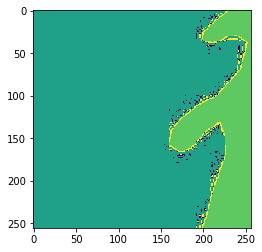

In [87]:
plt.imshow(a[:,:,3])